## How does the deep learning recognize the hand written numerical digits ??


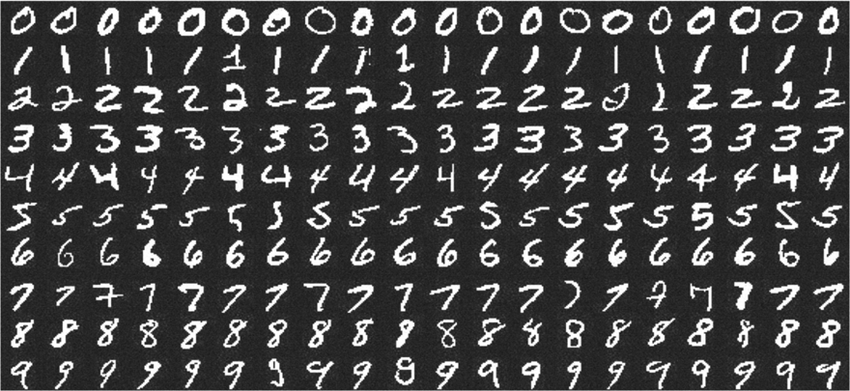

## The model takes image of hand written digit and predict what's number crossponding to 

## Will use mnist data set which conatins 70,000 images of numbers from (0-9)


## Load data from keras datasets

In [2]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

## Visual the first 6 Training images

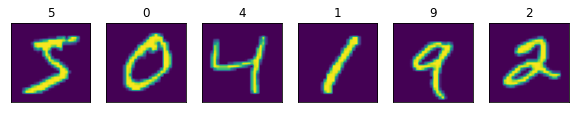

In [12]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])

## View Image in more details 

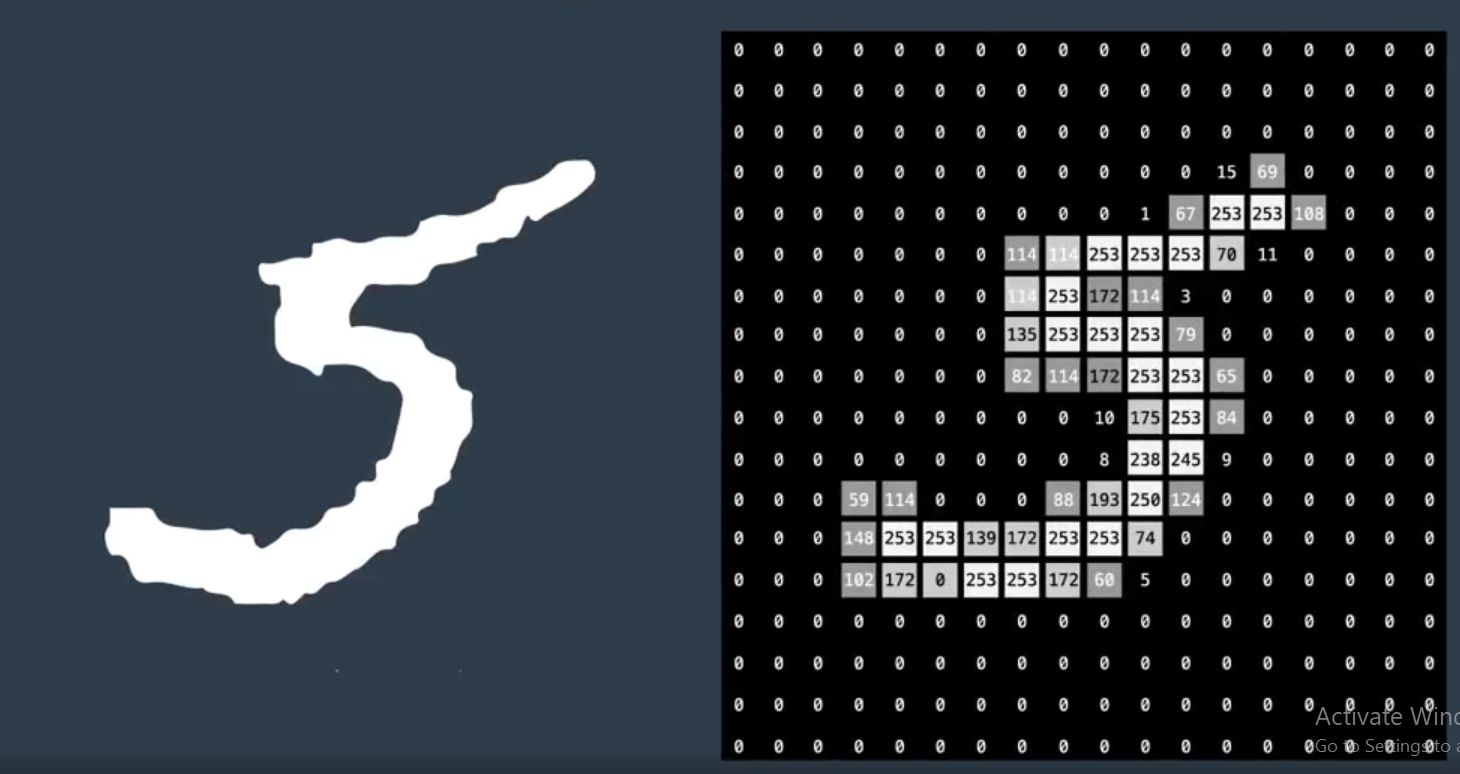

### Every image is constists of 28x28 pixel every pixel can be:
#### white->>255
#### black->>0
#### gray->>0-255

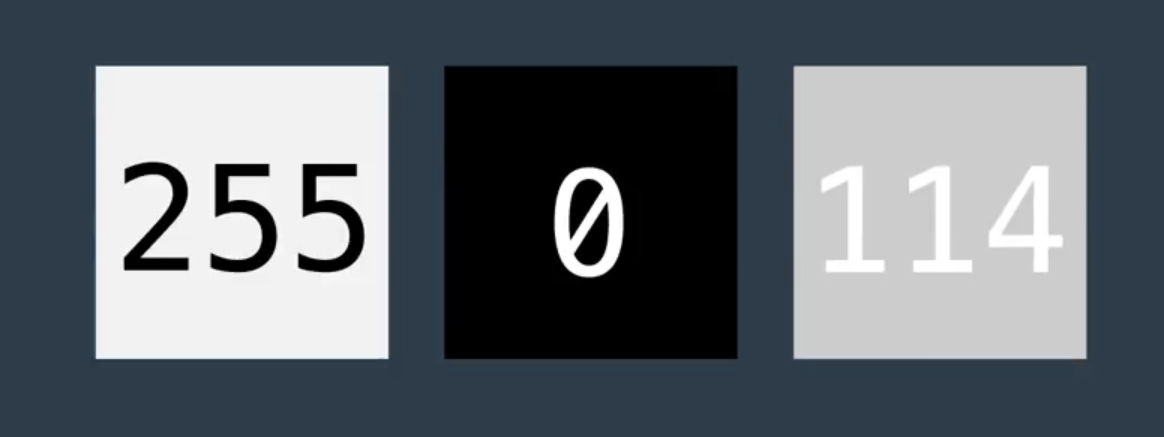

### Now we need to re scale the images by divid the xtrain and xtest by 255 to become it's values from 0 to 1

In [13]:
X_train=X_train/255
y_train=y_train/255

## Since our labels is numbers from 0 to 9 so will convert the this categoris to one hot encoder using keras

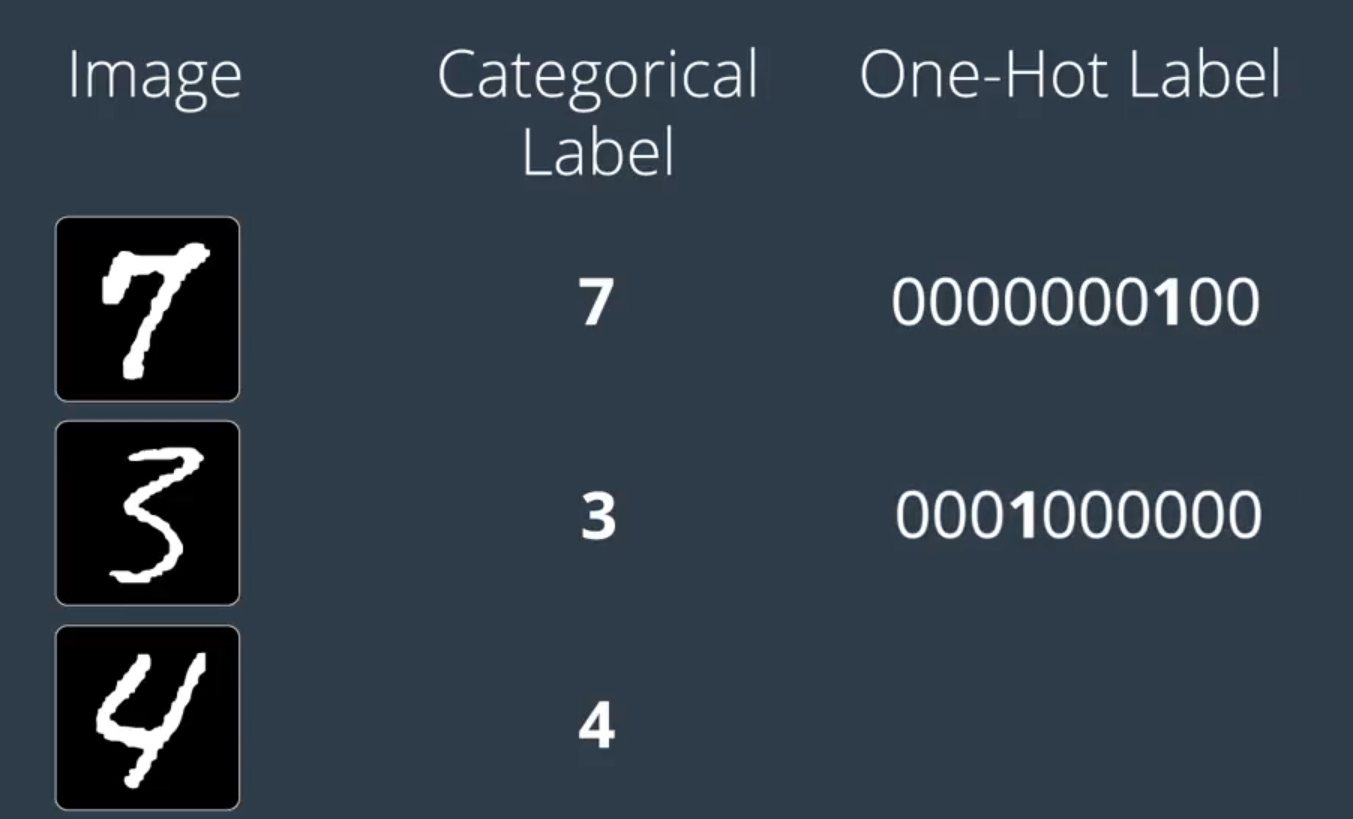

In [18]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#### Now we needed to flatten the image how and why?
#####  because we need to convert the image from 2d matrix into one d matrix by represent the image in form of 28x28 
##### ex: if we have an 4x4 image will convert them two 1*16 all image in one row
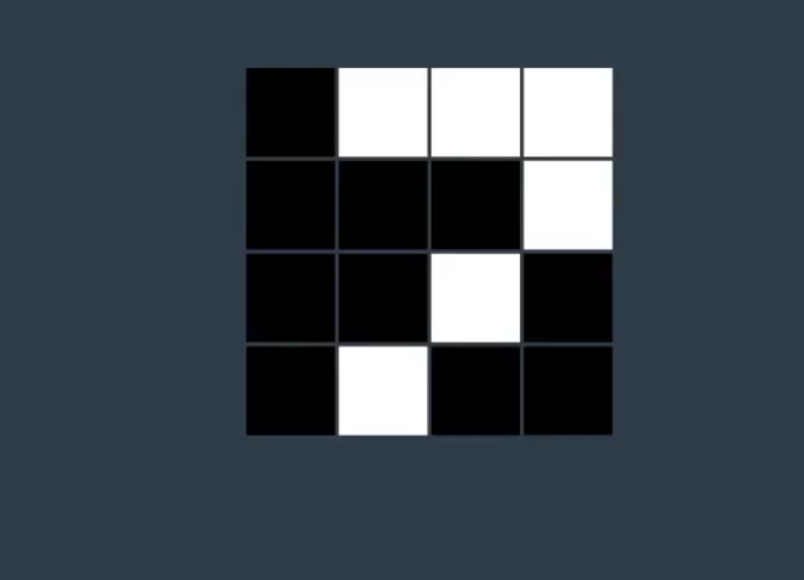
##### after convert them 
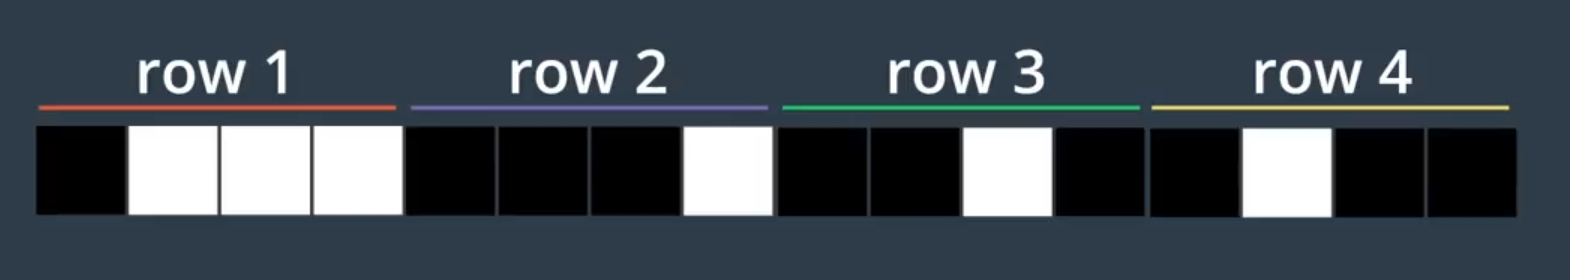

## So in our data set 28x28 to 1x748

## Now our step to design the neural network 
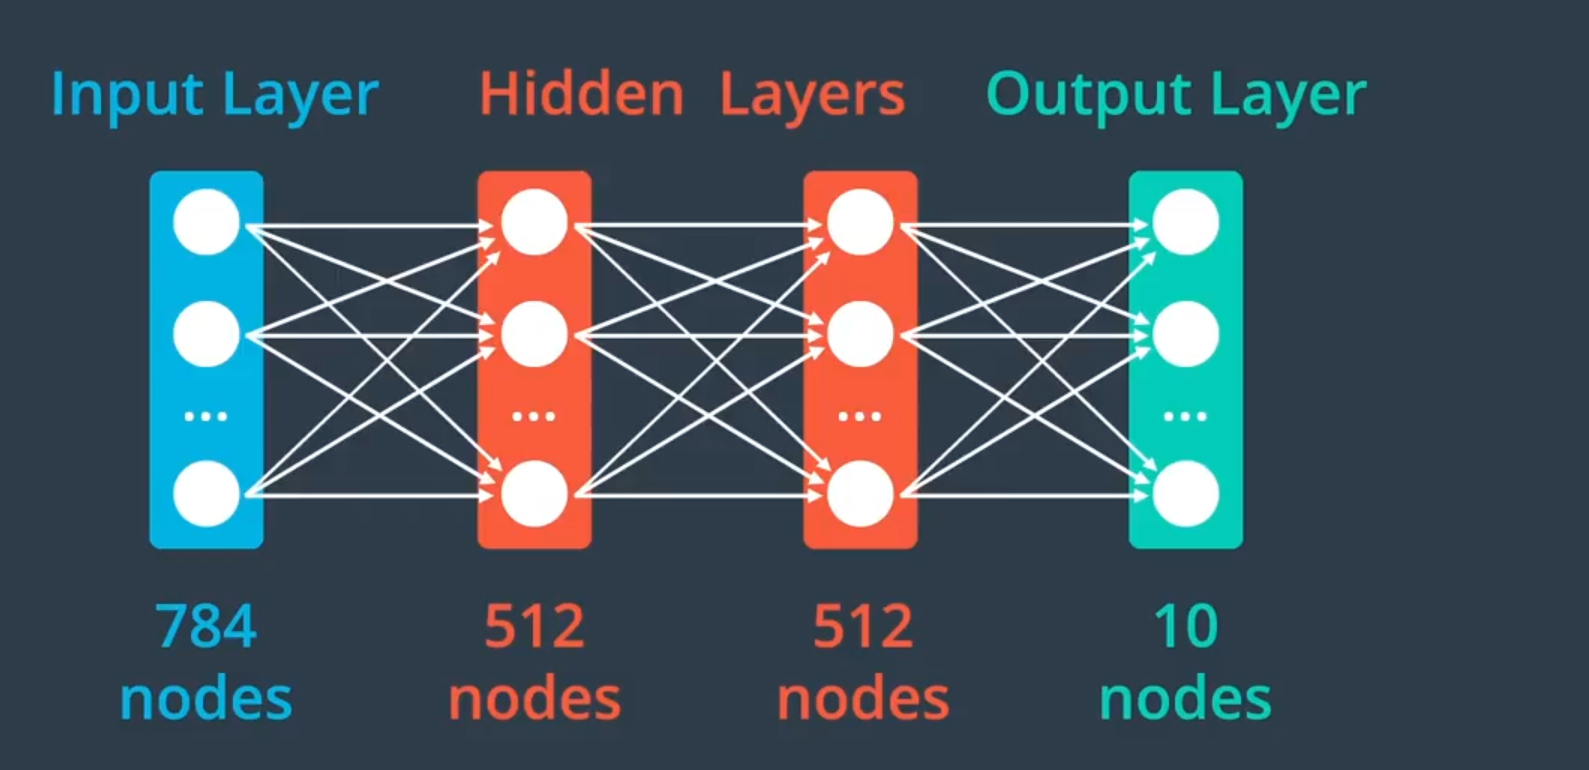
### will start by our input is 748 node using flatten layer as input
### Lets use two hidden layers every one 512 node and use the relu as activation to avoid the vanshing gradinet 
### use drop out to avoid the over fitting so will use drop out between the layers
### use the output layers with 10 nodes(no of classes) and it's activation is softmax 

In [33]:
from keras.layers import Dense,Dropout,Flatten
from keras.models import Sequential

In [31]:
model=Sequential()

In [41]:
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

## What's categorical crossentropy??
#### in this example the model prediction 1 is 0 0 0 0.1 0 0 0 0 0.9 0 this means that 0.1 precentage is class 3 and 0.9 is class 8
#### while the model 2 is the it.s 0.9 precentage is class 3 and 0.1 precentage is class 8
#### the cross entropy is consider as loss in model -log(.1)=2.30
#### the cross entopy is consider as los in model is -log(0.9)=0.105 
#### the small the cross entopy the best the model 

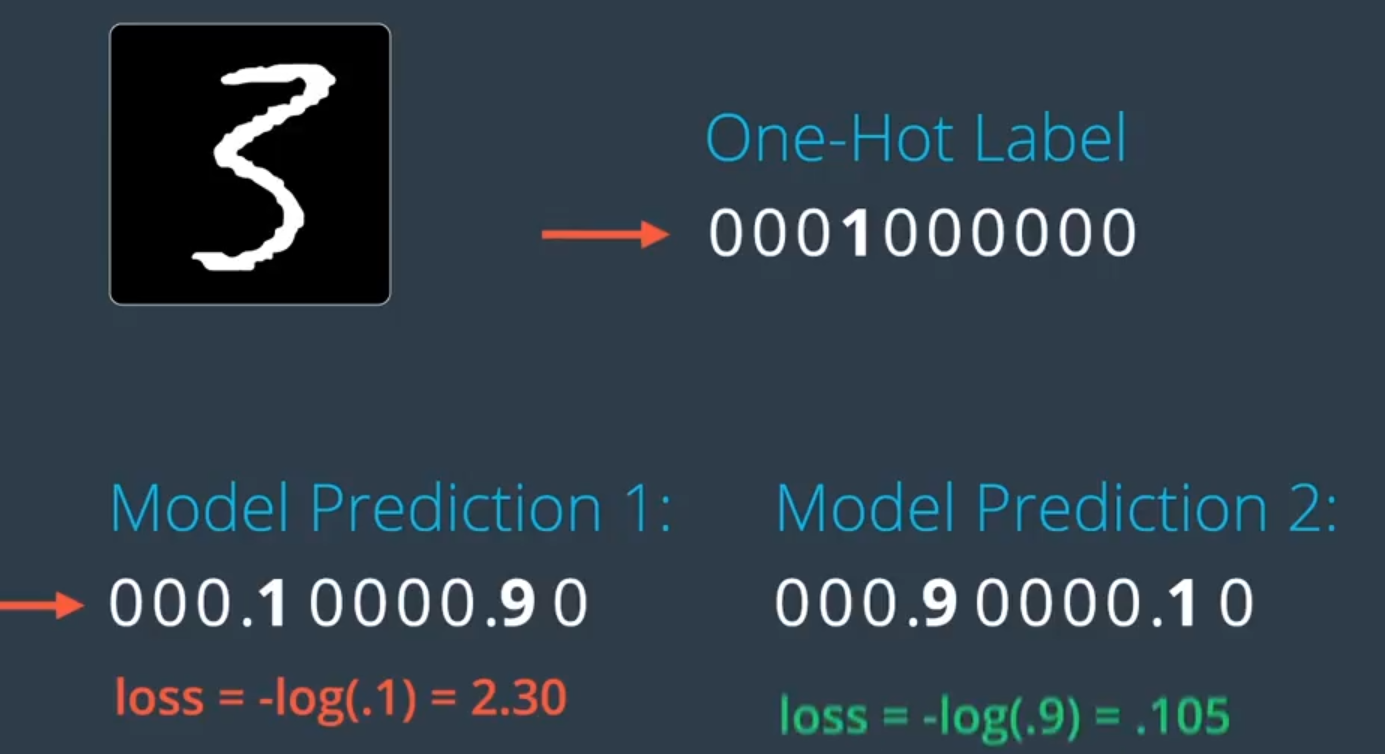

In [43]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

## Without training

In [46]:
model.evaluate(X_test,y_test,verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 88.8542 - accuracy: 0.1248


[88.85416412353516, 0.12479999661445618]

## Check Points used to save the best weights

In [49]:
from keras.callbacks import ModelCheckpoint

In [50]:
checkpoitner=ModelCheckpoint(filepath="model.mnist.best.hdf5",verbose=1,save_best_only=True)

In [60]:
history=model.fit(X_train,y_train,shuffle=True,callbacks=[checkpoitner],verbose=1,validation_split=0.2,batch_size=128,epochs=10)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 1.4901e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
375/375 [==============================] - 6s 17ms/step - loss: 9.9341e-12 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 2.4835e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 1.4901e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 4.7187e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 4.9671e-12 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 1.2418e-11 - accura

In [61]:
model.evaluate(X_test,y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 12295.9580 - accuracy: 0.0980


[12295.9580078125, 0.09799999743700027]

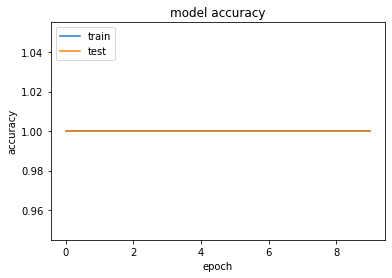

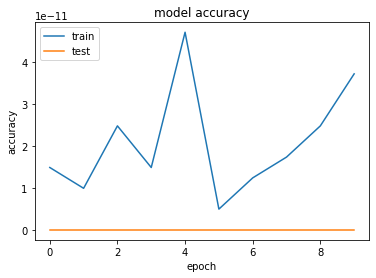

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Now will change the no of eh hidden layers nodes to shows if overfiiten occurs

In [63]:
model2=Sequential()
model2.add(Flatten(input_shape=X_train.shape[1:]))
model2.add(Dense(1012,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1012,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation="softmax"))
model2.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
history=model2.fit(X_train,y_train,shuffle=True,callbacks=[checkpoitner],verbose=1,validation_split=0.2,batch_size=128,epochs=10)
model2.evaluate(X_test,y_test,verbose=1)

Epoch 1/10
375/375 [==============================] - 12s 30ms/step - loss: 0.0066 - accuracy: 0.9973 - val_loss: 1.0431e-09 - val_accuracy: 1.0000
Epoch 2/10
375/375 [==============================] - 11s 29ms/step - loss: 1.2815e-09 - accuracy: 1.0000 - val_loss: 2.6822e-10 - val_accuracy: 1.0000
Epoch 3/10
375/375 [==============================] - 11s 29ms/step - loss: 3.9736e-10 - accuracy: 1.0000 - val_loss: 1.3908e-10 - val_accuracy: 1.0000
Epoch 4/10
375/375 [==============================] - 11s 30ms/step - loss: 1.8875e-10 - accuracy: 1.0000 - val_loss: 1.1921e-10 - val_accuracy: 1.0000
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 1.9868e-10 - accuracy: 1.0000 - val_loss: 9.9341e-11 - val_accuracy: 1.0000
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 1.7633e-10 - accuracy: 1.0000 - val_loss: 6.9539e-11 - val_accuracy: 1.0000
Epoch 7/10
375/375 [==============================] - 11s 29ms/step - loss: 2.7070e-10 - acc

[10760.232421875, 0.09799999743700027]

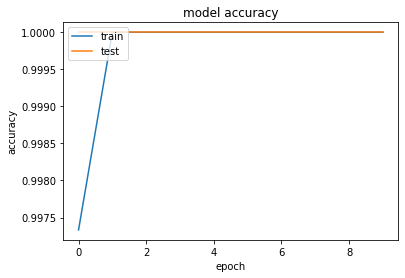

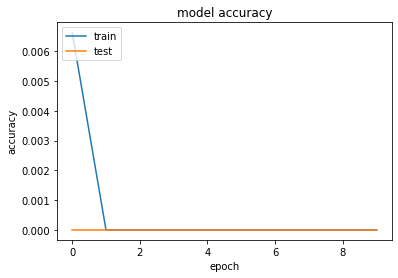

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
model2=Sequential()
model2.add(Flatten(input_shape=X_train.shape[1:]))
model2.add(Dense(12,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(12,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation="softmax"))
model2.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
history=model2.fit(X_train,y_train,shuffle=True,callbacks=[checkpoitner],verbose=1,validation_split=0.2,batch_size=128,epochs=10)
model2.evaluate(X_test,y_test,verbose=1)

Epoch 1/10
375/375 [==============================] - 2s 2ms/step - loss: 0.1404 - accuracy: 0.9699 - val_loss: 1.1623e-09 - val_accuracy: 1.0000
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 3.9790e-04 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.1683e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 6.6182e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 1.3402e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 8.5525e-05 - accuracy: 1.0000 - va

[46207.140625, 0.09799999743700027]

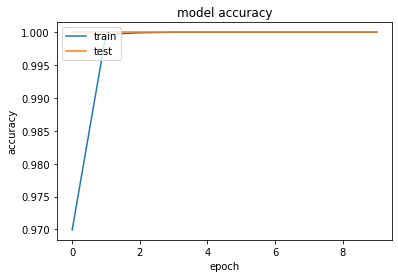

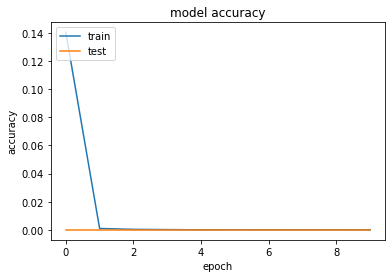

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
model2=Sequential()
model2.add(Flatten(input_shape=X_train.shape[1:]))
model2.add(Dense(1000,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(12,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation="softmax"))
model2.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
history=model2.fit(X_train,y_train,callbacks=[checkpoitner],verbose=1,validation_split=0.4,batch_size=128,epochs=10)
model2.evaluate(X_test,y_test,verbose=1)

Epoch 1/10
282/282 [==============================] - 4s 14ms/step - loss: 0.0087 - accuracy: 0.9967 - val_loss: 2.3961e-08 - val_accuracy: 1.0000
Epoch 2/10
282/282 [==============================] - 4s 14ms/step - loss: 7.5002e-09 - accuracy: 1.0000 - val_loss: 3.9885e-09 - val_accuracy: 1.0000
Epoch 3/10
282/282 [==============================] - 4s 14ms/step - loss: 2.1358e-09 - accuracy: 1.0000 - val_loss: 2.2302e-09 - val_accuracy: 1.0000
Epoch 4/10
282/282 [==============================] - 4s 15ms/step - loss: 1.0298e-09 - accuracy: 1.0000 - val_loss: 1.6143e-09 - val_accuracy: 1.0000
Epoch 5/10
282/282 [==============================] - 4s 14ms/step - loss: 1.0828e-09 - accuracy: 1.0000 - val_loss: 1.1673e-09 - val_accuracy: 1.0000
Epoch 6/10
282/282 [==============================] - 4s 14ms/step - loss: 6.3578e-10 - accuracy: 1.0000 - val_loss: 9.7851e-10 - val_accuracy: 1.0000
Epoch 7/10
282/282 [==============================] - 4s 15ms/step - loss: 5.2320e-10 - accuracy: 

[10708.607421875, 0.09799999743700027]

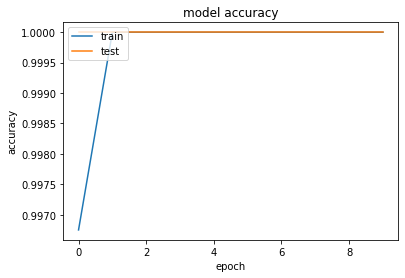

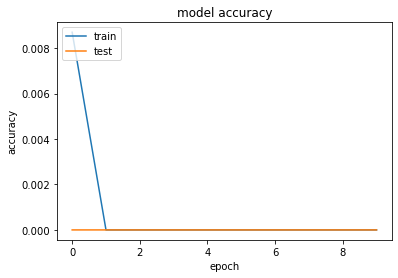

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
import numpy as np
np.random.seed(32)
model2=Sequential()
model2.add(Flatten(input_shape=X_train.shape[1:]))
model2.add(Dense(1000,activation='sigmoid'))
# model2.add(Dropout(0.2))
model2.add(Dense(12,activation='sigmoid'))
# model2.add(Dropout(0.2))
model2.add(Dense(10,activation="softmax"))
model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model2.fit(X_train,y_train,callbacks=[checkpoitner],verbose=1,validation_split=0.2,batch_size=12,epochs=10)
model2.evaluate(X_test,y_test,verbose=1)

Epoch 1/10
4000/4000 [==============================] - 20s 5ms/step - loss: 0.0990 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 2/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.2835e-04 - val_accuracy: 1.0000
Epoch 3/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.2280e-04 - accuracy: 1.0000 - val_loss: 1.2636e-05 - val_accuracy: 1.0000
Epoch 4/10
4000/4000 [==============================] - 19s 5ms/step - loss: 5.2249e-06 - accuracy: 1.0000 - val_loss: 1.7881e-06 - val_accuracy: 1.0000
Epoch 5/10
4000/4000 [==============================] - 19s 5ms/step - loss: 7.1911e-07 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 6/10
4000/4000 [==============================] - 19s 5ms/step - loss: 5.2465e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0000e+00 - accu

[18.488666534423828, 0.09799999743700027]